In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2 #para trabajar con el archivo comprimido en python
import time 

path_bookings='bookings.csv.bz2'
path_bookings_sample='bookings.sample.csv.bz2'
path_bookings_clean='bookings.clean.csv.bz2'
path_searches='searches.csv.bz2'
path_searches_sample='searches.sample.csv.bz2'
path_searches_clean='searches_clean.csv.bz2'

### Exercise 1  
Count the number of lines in Python for each file.

In [21]:
! ls -lt 

total 1018900
-rw------- 1 bea bea    152872 nov 22 19:39 reto_Amadeus.ipynb
-rw------- 1 bea bea       133 nov 22 18:57 02.out.csv
-rw------- 1 bea bea       325 nov 22 18:57 03.out.csv
-rw------- 1 bea bea      1274 nov 22 18:57 03_out_plot.png
-rw------- 1 bea bea    535893 nov 22 18:57 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 22 18:57 searches.sample.csv.bz2
-rw------- 1 bea bea 554970628 nov 22 18:57 bookings.csv.bz2
-rw------- 1 bea bea   4232732 nov 22 18:57 bookings.sample.csv
-rw------- 1 bea bea 483188920 nov 22 18:57 searches.csv.bz2


In [24]:
# Extrae 100000 lineas para crear un archivo csv de muestra:

! bzcat bookings.csv.bz2 | head -n 10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [25]:
# comprime el archivo en formato bz2: 

! bzip2  bookings.sample.csv 

bzip2: Output file bookings.sample.csv.bz2 already exists.


In [26]:
! ls -lt

total 1018900
-rw------- 1 bea bea   4232732 nov 22 19:58 bookings.sample.csv
-rw------- 1 bea bea    153300 nov 22 19:57 reto_Amadeus.ipynb
-rw------- 1 bea bea       133 nov 22 18:57 02.out.csv
-rw------- 1 bea bea       325 nov 22 18:57 03.out.csv
-rw------- 1 bea bea      1274 nov 22 18:57 03_out_plot.png
-rw------- 1 bea bea    535893 nov 22 18:57 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 22 18:57 searches.sample.csv.bz2
-rw------- 1 bea bea 554970628 nov 22 18:57 bookings.csv.bz2
-rw------- 1 bea bea 483188920 nov 22 18:57 searches.csv.bz2


In [27]:
! bzcat bookings.csv.bz2 | head -3

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

###### Exercise 1:  
Pruebas con archivo de muestra.

In [34]:
# Forma no recomendada de acceder al archivo comprimido. 
# Requiere cerrar el archivo más tarde (o produce error si se ejecuta de nuevo).

fileBz2=bz2.BZ2File(path_bookings_sample)

In [35]:
fileBz2.close

<bound method BZ2File.close of <bz2.BZ2File object at 0x7f8e8c1926d8>>

In [36]:
# Forma recomendada para acceder al archivo comprimido. El archivo queda cerrado en la misma instrucción.
# Prueba: contar líneas con el archivo de muestra.

with bz2.BZ2File(path_bookings_sample) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
print (counter)

10000


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Python)

In [71]:
t_0=time.process_time() # Inicio del proceso

with bz2.BZ2File(path_bookings) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_booking=counter

tempus=time.process_time()-t_0 # Tiempo de proceso

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_bookings}: {num_lineas_booking}')

tiempo de proceso: 123.70086993300015
número de líneas en bookings.csv.bz2: 10000011


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Python)

In [65]:
t_0=time.process_time() 

with bz2.BZ2File(path_searches) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_searches=counter

tempus=time.process_time()-t_0 

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_searches}: {num_lineas_searches}')

tiempo de proceso: 139.14108804600005
número de líneas en searches.csv.bz2: 20390199


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Pandas)

In [68]:
# Pruebas con sample. Crea iterable descomprimiendo fragmento a fragmento:

reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=1000)

In [69]:
# Pruebas con sample. Cuenta filas de dataframe de muestra:

t_0=time.process_time()

nrows=0
for df in reader: nrows=nrows+len(df)
    
tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings_sample}: {nrows}')

tiempo de proceso: 0.22774768899989795
número de filas en bookings.sample.csv.bz2: 9999


In [70]:
# Filas de dataframe bookings (excluída fila de títulos de col.):

t_0=time.process_time()

Big_reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader: nrows=nrows+len(df)

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings}: {nrows}')

tiempo de proceso: 0.22774768899989795
número de filas en bookings.csv.bz2: 10000010


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Pandas)

In [72]:
# Filas del dataframe searches:

t_0=time.process_time()

Big_reader_2=pd.read_csv(path_searches,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader_2: 
    nrows=nrows+len(df)

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_searches}: {nrows}')

tiempo de proceso: 203.84343241800002
número de filas en searches.csv.bz2: 20390198


## Exercise 2  
Top 10 arrival airports in the world in 2013 (using the bookings file).  
- Arrival airport is the column arr_port. It is the IATA code for the airport.  
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).  
- Print the top 10 arrival airports in the standard output, including the number of passengers.  
- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github).  
- Bonus point: Solve this problem using pandas (instead of any other approach).

###### Inspección rápida de sample de bookings: 

In [125]:
df_bo_sample=pd.read_csv(path_bookings_sample,delimiter='^')

In [60]:
df_bo_sample.shape

(9999, 38)

In [56]:
df_bo_sample.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [57]:
df_bo_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [58]:
# Para evitar contar espacios en blanco, referencia a columnas por posición:

df_bo_sample.columns[5]

'rloc          '

In [59]:
# Valores únicos de columna rloc en bookings.sample:

df_bo_sample[df_bo_sample.columns[5]].nunique()

3638

###### Exercise2  
Pruebas con csv de muestra. Ajustes para homogeneizar registros antes de eliminar duplicados.   

In [126]:
# Arreglos en títulos de columnas:

for col in df_bo_sample.columns: 
    df_bo_sample=df_bo_sample.rename(columns={col:col.strip()})
print (df_bo_sample.columns)

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')


In [127]:
# Para identificar columnas no numéricas:

print (df_bo_sample.dtypes)
print (f'{len(df_bo_sample.columns)} columnas')

act_date     object
source       object
pos_ctry     object
pos_iata     object
pos_oid      object
rloc         object
cre_date     object
duration      int64
distance      int64
dep_port     object
dep_city     object
dep_ctry     object
arr_port     object
arr_city     object
arr_ctry     object
lst_port     object
lst_city     object
lst_ctry     object
brd_port     object
brd_city     object
brd_ctry     object
off_port     object
off_city     object
off_ctry     object
mkt_port     object
mkt_city     object
mkt_ctry     object
intl          int64
route        object
carrier      object
bkg_class    object
cab_class    object
brd_time     object
off_time     object
pax           int64
year          int64
month         int64
oid          object
dtype: object
38 columnas


In [140]:
# Lista de columnas de tipo object: 

obj_cols=df_bo_sample.columns[df_bo_sample.dtypes==object]
print (obj_cols)
print (f'{len (obj_cols)} columnas tipo object')

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city',
       'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city',
       'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city',
       'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time',
       'off_time', 'oid'],
      dtype='object')
32 columnas tipo object


In [141]:
# Fila 3 como referencia para identificar columnas en mayúsculas (tiene registros en todas las col. no númericas).

df_bo_sample[obj_cols].iloc[3]

act_date                  2013-03-26 00:00:00
source                                     1A
pos_ctry                                   AU
pos_iata     0f984b3bb6bd06661c95529bbd6193bc
pos_oid      36472c6dbaf7afec9136ac40364e2794
rloc         5ecf00fdcbcec761c43dc7285253d0c1
cre_date                  2013-03-26 00:00:00
dep_port                                  AKL
dep_city                                  AKL
dep_ctry                                   NZ
arr_port                                  SVO
arr_city                                  MOW
arr_ctry                                   RU
lst_port                                  AKL
lst_city                                  AKL
lst_ctry                                   NZ
brd_port                                  AKL
brd_city                                  AKL
brd_ctry                                   NZ
off_port                                  SVO
off_city                                  MOW
off_ctry                          

In [142]:
# Lista de columnas con registros que deben estar escritos en mayúsculas:

uppercase_cols=list()
for col in obj_cols: 
    if df_bo_sample[col].iloc[3]==df_bo_sample[col].iloc[3].upper():
        uppercase_cols.append(col)
print (uppercase_cols)

['act_date', 'source', 'pos_ctry', 'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time', 'off_time', 'oid']


In [143]:
# Para homogenizar registros en columnas no numéricas: 

for col in obj_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.strip() # Quitar blancos delante y detŕas 
for col in uppercase_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.upper() # Corrige posibles minúsculas indebidas
df_bo_sample.head()


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [145]:
# Eliminar filas duplicadas y seleccionar columnas relevantes:

df_bo_sample_rdz=df_bo_sample.drop_duplicates()[['arr_port','pax']]
print (f'{len(df_bo_sample_rdz)} filas no duplicadas en {path_bookings_sample}')

9999 filas no duplicadas en bookings.sample.csv.bz2


###### Exercise 2   
Top 10 aeropuertos por pasajeros en sample como **benchmark** para comprobación posterior.

In [147]:
top10_bmark=df_bo_sample_rdz.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_bmark

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


###### Exercise 2   
Top 10 aeropuertos por pasajeros en sample leyendo chunk a chunk:

In [185]:
# Prueba con sample usando chunks: 
# Ensayo para eliminar duplicados.

t_0 = time.process_time()

small_chk=100
reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de cols. no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de cols. que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%50==0:
        print(f'{i+1} chunks de {small_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_smpl_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings_sample}: {len(df_bo_smpl_clean)}')

50 chunks de 100 filas; 5000 filas nuevas
100 chunks de 100 filas; 4999 filas nuevas
tiempo de proceso: 8.026498119999815
número de filas distintas en bookings.sample.csv.bz2: 9999


In [198]:
# Top10 aeropuertos por pasajeros en csv de muestra leída con chunks:

relevant_cols=['arr_port','pax']
df_bo_smpl_rdzd=df_bo_smpl_clean[relevant_cols]
top10_sample=df_bo_smpl_rdzd.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_sample

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [199]:
# Comprobación: Comparación del resultado con el benchmark (requiere prescindir de índices)

top10_bmark.reset_index(drop=True).equals(top10_sample.reset_index(drop=True))

True

###### Exercise 2   
Top 10 aeropuertos por pasajeros en booking.csv.bz2. 

In [187]:
# Intento de eliminar duplicados (requiere recursos para trabajar con el df sin duplicados completo).

t_0 = time.process_time()

big_chk=10000
reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=big_chk)
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de columnas no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de columnas que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%50==0:
        print(f'{i+1} chunks de {big_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings}: {len(df_bo_clean)}')

50 chunks de 10000 filas; 500000 filas nuevas
100 chunks de 10000 filas; 500000 filas nuevas
150 chunks de 10000 filas; 0 filas nuevas
200 chunks de 10000 filas; 0 filas nuevas
250 chunks de 10000 filas; 0 filas nuevas
300 chunks de 10000 filas; 0 filas nuevas
350 chunks de 10000 filas; 0 filas nuevas
400 chunks de 10000 filas; 0 filas nuevas
450 chunks de 10000 filas; 0 filas nuevas
500 chunks de 10000 filas; 0 filas nuevas
550 chunks de 10000 filas; 9993 filas nuevas
600 chunks de 10000 filas; 0 filas nuevas
650 chunks de 10000 filas; 0 filas nuevas
700 chunks de 10000 filas; 0 filas nuevas
750 chunks de 10000 filas; 0 filas nuevas
800 chunks de 10000 filas; 0 filas nuevas
850 chunks de 10000 filas; 0 filas nuevas
900 chunks de 10000 filas; 0 filas nuevas
950 chunks de 10000 filas; 0 filas nuevas
1000 chunks de 10000 filas; 0 filas nuevas
tiempo de proceso: 5635.870549705998
número de filas distintas en bookings.csv.bz2: 1009993


In [180]:
df_bo_clean.to_csv('bookings.clean.csv.bz2',sep='^',compression='bz2',index=False)
# path to bookings.clean.csv.bz2 en primera celda

In [191]:
# Inspección: 
 
reader=pd.read_csv(path_booking_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
for df in reader: 
    df_check=df
    break
print (df_check.shape)
df_check.head()

(100, 38)


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NaN
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NaN
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NaN
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


###### Aclaración:   
El procedimiento empleado para eliminar duplicados funciona porque hay muchos: el dataset que se va construyendo chunk a chunk con las filas no duplicadas es manejable con los recursos del equipo. El proceso requiere operar con todo el dataframe que se va construyendo porque es la referencia para identificar nuevos duplicados en cada nuevo chunk y añadir solo las filas no repetidas.   
Si el número de duplicados fuera menor y todos los chunk aportaran un buen número de filas originales, el dataframe se haría inmanejable para la cpu con unos pocos chunks.   
Por este motivo entiendo que el método de trabajo no es válido para datasets grandes con pocos duplicados. Es más correcto diseñar un proceso que permita eliminar duplicados también cuando son pocos y el dataframe sin duplicados sigue siendo inmanejable con un pc doméstico.  
En el ejercicio 3 se propone un **procedimiento alternativo para eliminar duplicados** que funciona incluso cuando el dataframe sin duplicados sigue siendo muy grande para trabajar con él completo. 

In [203]:
# Dataframe reducido (columnas relevantes) agrupadas por aeropuertos: 
# Sigo trajando con chunks como ejercicio, aunque el dataframe sin duplicados ya no lo requiere.

t_0=time.process_time()

relevant_cols=['arr_port','pax']
reader=pd.read_csv(path_bookings_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=big_chk,\
                  usecols=relevant_cols)
df_aux_0=pd.DataFrame()
for i, df in enumerate(reader):
    df_aux_1=df.groupby('arr_port').sum() # Agrupación chunk a chunk
    df_aux_0=df_aux.append(df_1)
    if (i+1)%50==0: print (f'{i+1} chunks de {big_chk} filas añadidos')
    #if (i+1)==51: break # Sanity check
df_bookings_PaxPerAirport=df_aux_0.copy()

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en df_bookings_PaxPerAirport: {len(df_bookings_PaxPerAirport)}')

50 chunks de 10000 filas añadidos
100 chunks de 10000 filas añadidos
tiempo de proceso: 10.763636962001328
número de filas en df_bookings_PaxPerAirport: 2271


#### Exercise 2: Top 10 de aeropuertos de destino por pasajeros

In [204]:
n_for_top_list=10
# (Nueva agrupación sobre el df con los chunks reunidos)
top_bookings=df_bookings_PaxPerAirport.groupby('arr_port').sum()\
            .sort_values(by='pax',ascending=False)[:n_for_top_list]
top_bookings

,pax
arr_port,
HKG,160
LGA,118
MCO,115
ORD,110
JFK,104
SFO,101
LAX,97
DCA,86
LHR,85


In [205]:
top_bookings.to_csv('02.out.csv',sep='^')

In [206]:
# Inspección: 

df=pd.read_csv('02.out.csv',sep='^')
df.head(10)

,arr_port,pax
0,HKG,160
1,LGA,118
2,MCO,115
3,ORD,110
4,JFK,104
5,SFO,101
6,LAX,97
7,DCA,86
8,LHR,85
9,DEN,83


## Exercise 3
Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona  
- For the arriving airport, you can use the Destination column in the searches file.  
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.  
- Bonus point: Solving this problem using pandas (instead of any other approach)

In [2]:
# Sample file para searches: 

! bzcat searches.csv.bz2 | head -n 10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [3]:
! bzip2  searches.sample.csv 

bzip2: Output file searches.sample.csv.bz2 already exists.


In [4]:
! ls -lt

total 1073836
-rw-r--r-- 1 bea bea   1824927 nov 24 17:13 searches.sample.csv
-rw-r--r-- 1 bea bea        65 nov 24 17:07 README.md
-rw------- 1 bea bea    186633 nov 24 17:03 reto_Amadeus.ipynb
-rw------- 1 bea bea        89 nov 24 16:50 02.out.csv
-rw-r--r-- 1 bea bea      3176 nov 24 15:35 Untitled.ipynb
-rw-r--r-- 1 bea bea  54385064 nov 23 20:49 bookings.clean.csv.bz2
-rw------- 1 bea bea   4232732 nov 22 19:58 bookings.sample.csv
-rw------- 1 bea bea       325 nov 22 18:57 03.out.csv
-rw------- 1 bea bea      1274 nov 22 18:57 03_out_plot.png
-rw------- 1 bea bea    535893 nov 22 18:57 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 22 18:57 searches.sample.csv.bz2
-rw------- 1 bea bea 554970628 nov 22 18:57 bookings.csv.bz2
-rw------- 1 bea bea 483188920 nov 22 18:57 searches.csv.bz2


In [89]:
# Inspección de archivo searches de muestra: 
# Path a muestra de searches en primera celda. 

df_se_sample=pd.read_csv(path_searches_sample,compression='bz2',sep='^')

In [90]:
df_se_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [91]:
df_se_sample.shape

(9999, 45)

In [92]:
df_se_sample.columns.sort_values()

Index(['Country', 'Date', 'Destination', 'From', 'InternetOffice',
       'IsFromInternet', 'IsFromVista', 'IsPublishedForNeg', 'NbSegments',
       'OfficeID', 'Origin', 'RoundTrip', 'Seg1Arrival', 'Seg1BookingCode',
       'Seg1Carrier', 'Seg1Date', 'Seg1Departure', 'Seg2Arrival',
       'Seg2BookingCode', 'Seg2Carrier', 'Seg2Date', 'Seg2Departure',
       'Seg3Arrival', 'Seg3BookingCode', 'Seg3Carrier', 'Seg3Date',
       'Seg3Departure', 'Seg4Arrival', 'Seg4BookingCode', 'Seg4Carrier',
       'Seg4Date', 'Seg4Departure', 'Seg5Arrival', 'Seg5BookingCode',
       'Seg5Carrier', 'Seg5Date', 'Seg5Departure', 'Seg6Arrival',
       'Seg6BookingCode', 'Seg6Carrier', 'Seg6Date', 'Seg6Departure',
       'TerminalID', 'Time', 'TxnCode'],
      dtype='object')

In [93]:
print (f'{len(df_se_sample.columns)} columnas en searches')
df_se_sample.dtypes

45 columnas en searches


Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [94]:
# Columnas no numéricas en searches: 

se_obj_cols=df_se_sample.columns[df_se_sample.dtypes=='object']
print (f'{len(se_obj_cols)} columnas no numéricas en searches')
se_obj_cols

40 columnas no numéricas en searches


Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'Seg1Departure', 'Seg1Arrival', 'Seg1Date',
       'Seg1Carrier', 'Seg1BookingCode', 'Seg2Departure', 'Seg2Arrival',
       'Seg2Date', 'Seg2Carrier', 'Seg2BookingCode', 'Seg3Departure',
       'Seg3Arrival', 'Seg3Date', 'Seg3Carrier', 'Seg3BookingCode',
       'Seg4Departure', 'Seg4Arrival', 'Seg4Date', 'Seg4Carrier',
       'Seg4BookingCode', 'Seg5Departure', 'Seg5Arrival', 'Seg5Date',
       'Seg5Carrier', 'Seg5BookingCode', 'Seg6Departure', 'Seg6Arrival',
       'Seg6Date', 'Seg6Carrier', 'Seg6BookingCode', 'From', 'TerminalID',
       'InternetOffice'],
      dtype='object')

In [95]:
# Para identificar cols. que deben estar en mayúsculas: 

for col in se_obj_cols: 
    print (col, df_se_sample[col].unique()[-1]) # Sirve como referencia de valores no nan en cada campo

Date 2013-01-10
Time 15:32:04
TxnCode AIC
OfficeID e0ca92b506fbf482891d34ccebad0f32
Country VN
Origin IVC
Destination BFN
Seg1Departure IVC
Seg1Arrival BFN
Seg1Date 2013-10-27
Seg1Carrier YW
Seg1BookingCode X
Seg2Departure VLI
Seg2Arrival QXG
Seg2Date 2014-01-06
Seg2Carrier NM
Seg2BookingCode I
Seg3Departure OER
Seg3Arrival WDH
Seg3Date 2013-06-27
Seg3Carrier NM
Seg3BookingCode I
Seg4Departure WDH
Seg4Arrival GOT
Seg4Date 2013-06-27
Seg4Carrier VK
Seg4BookingCode I
Seg5Departure BOM
Seg5Arrival HYD
Seg5Date 2013-10-17
Seg5Carrier 4H
Seg5BookingCode D
Seg6Departure MIA
Seg6Arrival HAM
Seg6Date 2013-07-05
Seg6Carrier EU
Seg6BookingCode V
From AZ0FQ
TerminalID 7c676d48c11dae25a2c3e99bfbd42639
InternetOffice CCS


In [96]:
# Lista de cols. de searches que deben estar en mayúsculas: 

se_uppercase_cols=[]
for col in se_obj_cols:
    if df_se_sample[col].unique()[-1]==df_se_sample[col].unique()[-1].upper(): 
        se_uppercase_cols.append(col)
print (f'{len(se_uppercase_cols)} columnas en mayúsculas en searches')
se_uppercase_cols

38 columnas en mayúsculas en searches


['Date',
 'Time',
 'TxnCode',
 'Country',
 'Origin',
 'Destination',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'InternetOffice']

###### Procedimiento alternativo para eliminar duplicados:  
Ensayo de un procedimiento alternativo para eliminar duplicados sin mantener el df completo como referencia para identificar filas repetidas.  
En la **primera etapa** se eliminan duplicados en cada chunk y se guardan los df resultantes -e independientes- con el nombre dfc1, dfc2,... Se recuperan con globals( ) \['dfci'\] para cada valor numérico de i o con globals( ) \['dfc'+str(i)\] para iterar sobre i.  

In [116]:
# Primera etapa: ajusta la edición y elimina duplicados en cada chunk, y crea un dataframe dfc para cada uno. 
# Prueba con sample: 

t_0=time.process_time()

smll_chk=100
reader=pd.read_csv(path_searches_sample,compression='bz2',\
                   sep='^',iterator=True, chunksize=smll_chk)
df_aux_0=pd.DataFrame()
len_df_se_smpl_clean_0=0
for i, df in enumerate(reader):
    for col in se_obj_cols: 
        df[col]=df[col].astype(str).str.strip() # Corrección astype para esquivar traceback
    for col in se_uppercase_cols:
        df[col]=df[col].str.upper()
    dfc=df.drop_duplicates() # Elimina duplicados en cada chunk
    len_df_se_smpl_clean_0+=len(dfc)
    globals()['dfc'+str(i)]=dfc
    if (i+1)%10==0: print (f'{i+1} dfc creados')
    #if (i+1)==30: break # Sanity check
n_dfc=i+1 # Número de dataframes dfc creados     
    
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')
print (f'Número de filas tras primer drop_duplicates: {len_df_se_smpl_clean_0}')
print (f'Numero de dataframes dfc: {n_dfc}')

10 dfc creados
20 dfc creados
30 dfc creados
40 dfc creados
50 dfc creados
60 dfc creados
70 dfc creados
80 dfc creados
90 dfc creados
100 dfc creados
Tiempo de proceso: 4.122399225999999
Número de filas tras primer drop_duplicates: 9999
Numero de dataframes dfc: 100


In [117]:
# Inspección: 

globals()['dfc0'].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [120]:
# Inspección: 

rnd=np.random.randint(n_dfc)
print (f'Posicion dfc aleatoria: {rnd}')
globals()['dfc'+str(rnd)].head()

Posicion dfc aleatoria: 19


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1900,2013-01-02,04:56:07,MPT,80bbeea5f71357fa75b74f40ce4766d6,AU,BNE,SYD,0,1,BNE,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SYD
1901,2013-01-02,17:05:44,MTP,676ba5b6a22af8f99024015d94a6bb88,GB,LON,FAO,1,2,LON,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
1902,2013-01-02,17:18:55,MPT,8f0278c7aba9308fd8c3f1c59632488c,US,CHI,LON,1,2,CHI,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
1903,2013-01-02,01:08:54,ANP,aae6b142b5ce2db4931d67460e0c95e1,DE,BER,CAG,1,2,BER,...,NAN,NAN,NAN,NAN,NAN,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1904,2013-01-02,22:50:36,MPT,9789d17ec2629741f00ca74dda3a42d6,SE,ARN,OSL,0,1,ARN,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO


###### Procedimiento alternativo para eliminar duplicados:  
En la **segunda etapa** se compara cada dfc editado y sin duplicados con cada uno de los siguientes construyendo, en cada ciclo del bucle, un dataframe formado solo por dos dfc y eliminado aquí los duplicados: si hay alguno, se elimina la fila duplicada en el segundo dfc (la opción keep por defecto de drop_duplicates es 'first').  
A continuación se reconstruye el primer dfc -el usado como referencia, que no resulta afectado en este bucle- recuperando las filas que aportó al dataframe conjunto o doble (dfc_dbl).  El segundo dfc se reconstruye asignándole resto de filas del dataframe conjunto: son las que había aportado excepto las que ya estaban en el primer dfc.  
El proceso hace esto para cada dfc, comparando cada uno con todos los que le siguen. De ese modo, todos son comparados, dos a dos, con todos los demás. En cada ciclo principal -índice i- tomamos un dfc como referencia y nos aseguramos de que ninguno de los siguientes dfc (-índice j) contiene lineas que ya están en el de referencia. 

In [132]:
# Segunda etapa eliminación duplicados. Prueba con sample: 

t_0=time.process_time()

T_rows=0
for i in range(n_dfc): 
    for j in range(i+1,n_dfc): # Para comparar cada dfc con cada uno de los siguientes 
        len_dfci=len(globals()['dfc'+str(i)]) # len del dfc de referencia: no cambia con drop_duplicates (Default: keep='first')
        dfc_dbl=pd.DataFrame() # Dataframe auxiliar: guarda dfc dos a dos para eliminar duplicados del segundo
        dfc_dbl=globals()['dfc'+str(i)].append(globals()['dfc'+str(j)]).drop_duplicates()
        globals()['dfc'+str(i)]=dfc_dbl.iloc[:len_dfci] # Recupera las filas correspondientes al dfc de referencia
        globals()['dfc'+str(j)]=dfc_dbl.iloc[len_dfci:] # Recupera las filas no duplicadas del segundo dfc
    T_rows=T_rows+len_dfci
    if (i+1)%10==0:
        print (f'Total filas hasta {i+1}-ésimo dfc: {T_rows}')
    #if (i+1)==30:break # Sanity check
        
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')

Total filas hasta 10-ésimo dfc: 1000
Total filas hasta 20-ésimo dfc: 2000
Total filas hasta 30-ésimo dfc: 3000
Total filas hasta 40-ésimo dfc: 4000
Total filas hasta 50-ésimo dfc: 5000
Total filas hasta 60-ésimo dfc: 6000
Total filas hasta 70-ésimo dfc: 7000
Total filas hasta 80-ésimo dfc: 8000
Total filas hasta 90-ésimo dfc: 9000
Total filas hasta 100-ésimo dfc: 10000
Tiempo de proceso: 44.98789969799999


In [141]:
# Inspección: 









#repetir

len_dfc_sample_sum=0
for i in range (n_dfc):
    len_dfc_sample_sum+=len (globals()['dfc'+str(i)])
len_dfc_sample_sum

359004

In [ ]:
# Inspección: 





# repetir 

rnd=np.random.randint(n_dfc)
print (f'Posicion dfc aleatoria: {rnd}')
globals()['dfc'+str(rnd)].head()

###### Eliminación de duplicados en searches.csv.bz2:

In [139]:
# Primera etapa:

t_0=time.process_time()

z=0
while True:
    try: 
        del globals()['dfc'+str(z)] # Asegura que no se cuelan dfc de pruebas
        z=z+1
    except: break
print ('dfc reseteados')

huge_chk=100000
reader=pd.read_csv(path_searches,compression='bz2',sep='^',\
                   iterator=True, chunksize=huge_chk, dtype='unicode')
df_aux_0=pd.DataFrame()
len_df_se_clean_0=0
for i, df in enumerate(reader):
    for col in se_obj_cols: 
        df[col]=df[col].astype(str).str.strip() # Corrección astype para esquivar traceback
    for col in se_uppercase_cols:
        df[col]=df[col].str.upper()
    dfc=df.drop_duplicates() # Elimina duplicados en cada chunk
    len_df_se_clean_0+=len(dfc)
    globals()['dfc'+str(i)]=dfc
    if (i+1)%10==0: print (f'{i+1} dfc creados')
    #if (i+1)==30: break # Sanity check
n_dfc=i+1 # Número de dataframes dfc creados     
    
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')
print (f'Número de filas tras primer drop_duplicates: {len_df_se_clean_0}')
print (f'Numero de dataframes dfc: {n_dfc}')

dfc reseteados
10 dfc creados
20 dfc creados
30 dfc creados
40 dfc creados
50 dfc creados
60 dfc creados
70 dfc creados
80 dfc creados
90 dfc creados
100 dfc creados
110 dfc creados
120 dfc creados
130 dfc creados
140 dfc creados
150 dfc creados
160 dfc creados
170 dfc creados
180 dfc creados
190 dfc creados
200 dfc creados
Tiempo de proceso: 795.668339169999
Número de filas tras primer drop_duplicates: 20389899
Numero de dataframes dfc: 204


In [140]:
# Segunda etapa: 

t_0=time.process_time()

T_rows=0
for i in range(n_dfc): 
    for j in range(i+1,n_dfc): # Para comparar cada dfc con cada uno de los siguientes 
        len_dfci=len(globals()['dfc'+str(i)]) # len del dfc de referencia: no cambia con drop_duplicates (Default: keep='first')
        dfc_dbl=pd.DataFrame() # Dataframe auxiliar: guarda dfc dos a dos para eliminar duplicados del segundo
        dfc_dbl=globals()['dfc'+str(i)].append(globals()['dfc'+str(j)]).drop_duplicates()
        globals()['dfc'+str(i)]=dfc_dbl.iloc[:len_dfci] # Recupera las filas correspondientes al dfc de referencia
        globals()['dfc'+str(j)]=dfc_dbl.iloc[len_dfci:] # Recupera las filas no duplicadas del segundo dfc
    T_rows=T_rows+len_dfci
    if (i+1)%100==0:
        print (f'Total filas hasta {i+1}-ésimo dfc: {T_rows}')
    #if (i+1)==3:break # Sanity check
        
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')

Total filas hasta 100-ésimo dfc: 359003
Total filas hasta 200-ésimo dfc: 359003
Tiempo de proceso: 642.4229610740003


In [215]:
# Inspección: 

len_dfc_sum=0
for i in range (n_dfc):
    len_dfc_sum+=len (globals()['dfc'+str(i)])
len_dfc_sum

359004

In [212]:
# Inspección: 

globals()['dfc'+str(3)].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
300000,2013-10-28,05:05:32,FXP,4f6b7f4267cad29ec28b81b255fed079,ID,CGK,PLM,0,1,CGK,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300001,2013-10-28,23:45:08,MPT,bec61f55c64b17158ab8f074602fe0ca,US,PSP,CLT,1,2,PSP,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300002,2013-10-28,20:13:24,MPT,ef4ffc1e49c33c07f6e5c97ffa93e07e,UA,LED,VIE,1,2,LED,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300003,2013-10-28,16:10:59,MPT,b2f919c3d6a9ba67140ad215791fb7a1,RU,MOW,VCE,0,1,MOW,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300004,2013-10-28,22:27:06,MPT,e5b2bcab3bb7cc4b29a698e2f40ec244,US,ORD,CTG,1,2,ORD,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0


In [213]:
# Inspección: 

globals()['dfc'+str(4)].head() # Primer dfc que no aporta filas nuevas

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice


In [216]:
# Para guardar el dataframe searches limpio y completo como csv.bz2:

globals()['dfc0'].to_csv('searches_clean.csv.bz2',compression='bz2',\
                         sep='^',index=False)
for i in range(1,n_dfc):
    globals()['dfc'+str(i)].to_csv('searches_clean.csv.bz2',compression='bz2',\
                                   sep='^',index=False,mode='a',header=False)

In [219]:
# Inspección:
# Path para searches_clean en primera celda.

reader=pd.read_csv(path_searches_clean,compression='bz2',iterator=True,\
                   sep='^',chunksize=huge_chk)
len_dfc_T=0
for i, df in enumerate(reader):
    len_dfc_T+=len(df)
len_dfc_T

/home/bea/jupyter_entorno/data_science/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/bea/jupyter_entorno/data_science/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (40,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


359004

In [222]:
# Para reconstruir el dataframe searches solo con filas y columnas relevantes para el ejercicio 3:
# Path para searches_clean en primera celda.

t_0=time.process_time()

rlvnt_cols=['Date','Destination']
rlvnt_rows=['AGP','MAD','BCN'] # Aeropuertos de destino relevantes

reader=pd.read_csv(path_searches_clean,compression='bz2',iterator=True,\
                   sep='^',chunksize=huge_chk,usecols=rlvnt_cols)
df_se_cln_rdz=pd.DataFrame()
for i, df in enumerate(reader):
    df_mini=df[df['Destination'].isin(rlvnt_rows)]
    df_se_cln_rdz=df_se_cln_rdz.append(df_mini)
    print (f'Filas añadidas hasta {i+1}-ésimo chunk: {len(df_se_cln_rdz)}')

tempus=time.process_time()-t_0
print (f'Tiempo de proceso: {tempus}')

Filas añadidas hasta 1-ésimo chunk: 3663
Filas añadidas hasta 2-ésimo chunk: 7283
Filas añadidas hasta 3-ésimo chunk: 10348
Filas añadidas hasta 4-ésimo chunk: 11899
Tiempo de proceso: 3.2346118580007897


In [223]:
# Ajustes para tratar las fechas: 

df_se_cln_rdz['Year']=df_se_cln_rdz['Date'].str.split('-').str[0]
df_se_cln_rdz['Month']=df_se_cln_rdz['Date'].str.split('-').str[1]
df_se_cln_rdz.head()

,Date,Destination,Year,Month
4,2013-01-01,MAD,2013,01
93,2013-01-01,AGP,2013,01
113,2013-01-01,BCN,2013,01
147,2013-01-01,AGP,2013,01
151,2013-01-01,MAD,2013,01


In [225]:
# Inspección: 

print (df_se_cln_rdz['Year'].unique())
print (df_se_cln_rdz['Month'].unique())

['2013']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [227]:
# Pivot table de búsquedas de vuelos por meses: 

PT_searches=df_se_cln_rdz.pivot_table(index=['Year','Month'],columns='Destination',\
                                      values='Date',aggfunc='count')
PT_searches.head(12)

Destination  AGP  BCN  MAD
Year Month                
2013 01      169  517  425
     02      147  497  400
     03      187  536  433
     04      145  548  443
     05      190  504  462
     06      139  465  400
     07      156  513  403
     08      138  475  383
     09      143  411  371
     10      115  359  395
     11      114  354  362
     12       66  275  259

###### Exercise 3 : Plot de búsquedas de vuelos a BCN, MAD y AGP en searches.csv.bz2 

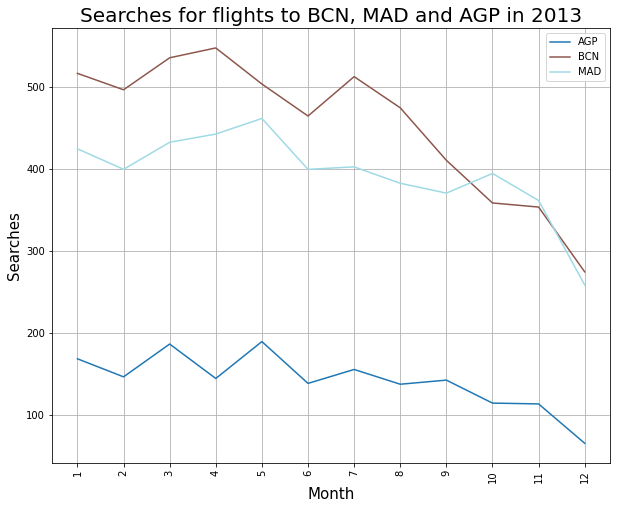

<Figure size 432x288 with 0 Axes>

In [228]:
PT_searches.plot(figsize=(10,8),cmap='tab20')
plt.title('Searches for flights to BCN, MAD and AGP in 2013',fontsize=20)
plt.grid(True)
plt.legend(loc='best',fontsize='medium',frameon=True)
plt.ylabel('Searches',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(np.arange(12),np.arange(1,13,1),rotation='vertical')
plt.show()
plt.savefig('03_out_plot')